# **11월 20일 - activity, sleep 전부 사용**

In [1]:
import numpy as np
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
train_activity = pd.read_csv('train_activity.csv')
train_sleep = pd.read_csv('train_sleep.csv')
train_mmse = pd.read_csv('train_mmse.csv')

In [3]:
training_label = pd.read_csv('training_label_activity.csv')

In [4]:
train_activity_groupby = train_activity.groupby('EMAIL')
train_activity_agg = pd.DataFrame()

train_sleep_groupby = train_sleep.groupby('EMAIL')
train_sleep_agg = pd.DataFrame()

### **장비를 착용하지 않은 시간이 길면 그날의 데이터를 신뢰할 수 없다고 판단**

In [5]:
train_activity['EMAIL'].value_counts()

EMAIL
nia+068@rowan.kr    120
nia+265@rowan.kr    118
nia+039@rowan.kr    115
nia+059@rowan.kr    113
nia+005@rowan.kr    113
                   ... 
nia+403@rowan.kr     37
nia+394@rowan.kr     36
nia+445@rowan.kr     36
nia+398@rowan.kr     36
nia+015@rowan.kr     35
Name: count, Length: 141, dtype: int64

<Axes: >

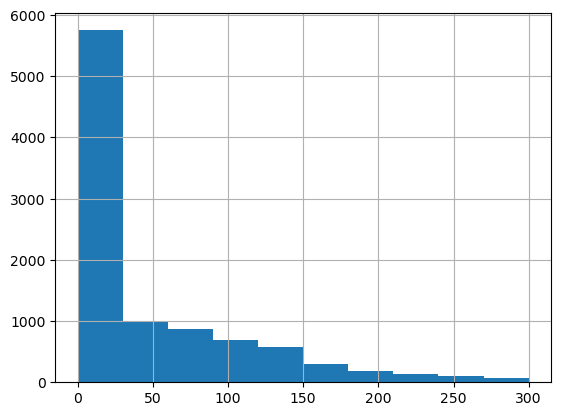

In [6]:
train_activity['activity_non_wear'].hist()

In [7]:
train_activity = train_activity[train_activity['activity_non_wear'] < 200]

In [8]:
train_activity['EMAIL'].value_counts()

EMAIL
nia+265@rowan.kr    117
nia+068@rowan.kr    114
nia+039@rowan.kr    113
nia+059@rowan.kr    112
nia+005@rowan.kr    112
                   ... 
nia+161@rowan.kr     34
nia+398@rowan.kr     34
nia+411@rowan.kr     34
nia+394@rowan.kr     33
nia+015@rowan.kr     30
Name: count, Length: 141, dtype: int64

<Axes: >

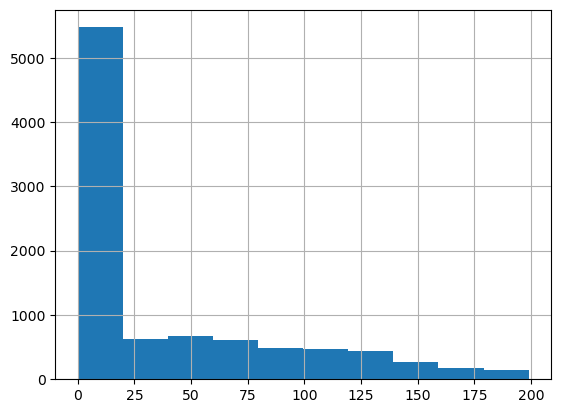

In [9]:
train_activity['activity_non_wear'].hist()

### **train_activity groupby**

In [10]:
train_activity_agg['activity_average_met_mean'] = train_activity_groupby['activity_average_met'].mean()
train_activity_agg['activity_average_met_max'] = train_activity_groupby['activity_average_met'].max()
train_activity_agg['activity_average_met_min'] = train_activity_groupby['activity_average_met'].min()

train_activity_agg['activity_cal_active_mean'] = train_activity_groupby['activity_cal_active'].mean()
train_activity_agg['activity_cal_active_max'] = train_activity_groupby['activity_cal_active'].max()
train_activity_agg['activity_cal_active_min'] = train_activity_groupby['activity_cal_active'].min()

train_activity_agg['activity_daily_movement_mean'] = train_activity_groupby['activity_daily_movement'].mean()
train_activity_agg['activity_daily_movement_max'] = train_activity_groupby['activity_daily_movement'].max()
train_activity_agg['activity_daily_movement_min'] = train_activity_groupby['activity_daily_movement'].min()

train_activity_agg['activity_low_mean'] = train_activity_groupby['activity_low'].mean()
train_activity_agg['activity_low_max'] = train_activity_groupby['activity_low'].max()
train_activity_agg['activity_low_min'] = train_activity_groupby['activity_low'].min()

train_activity_agg['activity_inactive_mean'] = train_activity_groupby['activity_inactive'].mean()
train_activity_agg['activity_inactive_max'] = train_activity_groupby['activity_inactive'].max()
train_activity_agg['activity_inactive_min'] = train_activity_groupby['activity_inactive'].min()

train_activity_agg['activity_score_mean'] = train_activity_groupby['activity_score'].mean()
train_activity_agg['activity_score_max'] = train_activity_groupby['activity_score'].max()
train_activity_agg['activity_score_min'] = train_activity_groupby['activity_score'].min()

In [11]:
train_activity_agg

,activity_average_met_mean,activity_average_met_max,activity_average_met_min,activity_cal_active_mean,activity_cal_active_max,activity_cal_active_min,activity_daily_movement_mean,activity_daily_movement_max,activity_daily_movement_min,activity_low_mean,activity_low_max,activity_low_min,activity_inactive_mean,activity_inactive_max,activity_inactive_min,activity_score_mean,activity_score_max,activity_score_min
EMAIL,,,,,,,,,,,,,,,,,,
nia+003@rowan.kr,1.262897,1.46875,1.09375,202.571429,531,51,3659.730159,10135,733,146.428571,293,62,615.142857,785,403,58.682540,82,46
nia+005@rowan.kr,1.370299,1.53125,1.21875,217.477876,377,106,5084.876106,9380,2644,281.300885,502,145,574.619469,761,346,54.522124,93,34
nia+010@rowan.kr,1.390625,1.68750,1.28125,259.672414,515,123,3877.741379,8296,1756,328.827586,659,209,632.482759,897,390,65.758621,92,48
nia+014@rowan.kr,1.442555,1.71875,1.25000,401.382353,746,216,7250.514706,13642,3404,343.852941,540,210,534.470588,745,328,91.264706,99,72
nia+015@rowan.kr,1.388393,1.53125,1.25000,271.685714,471,132,5053.200000,9304,2586,326.485714,533,179,484.085714,709,327,79.000000,98,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nia+451@rowan.kr,1.625822,2.75000,1.43750,660.394737,1266,481,12410.868421,24756,8983,302.868421,484,139,499.973684,671,71,90.552632,99,67
nia+456@rowan.kr,1.542480,1.81250,1.00000,573.781250,971,1,10846.750000,17998,11,283.140625,540,1,610.515625,929,12,87.359375,98,69
nia+458@rowan.kr,1.257353,1.37500,1.12500,200.549020,334,64,3377.098039,5852,912,206.823529,399,89,507.117647,673,274,61.686275,90,48


### **train_sleep groupby**

In [12]:
train_sleep_agg['sleep_duration_mean'] = train_sleep_groupby['sleep_duration'].mean()
train_sleep_agg['sleep_duration_max'] = train_sleep_groupby['sleep_duration'].max()
train_sleep_agg['sleep_duration_min'] = train_sleep_groupby['sleep_duration'].min()

train_sleep_agg['sleep_efficiency_mean'] = train_sleep_groupby['sleep_efficiency'].mean()
train_sleep_agg['sleep_efficiency_max'] = train_sleep_groupby['sleep_efficiency'].max()
train_sleep_agg['sleep_efficiency_min'] = train_sleep_groupby['sleep_efficiency'].min()

train_sleep_agg['sleep_score_disturbances_mean'] = train_sleep_groupby['sleep_score_disturbances'].mean()
train_sleep_agg['sleep_score_disturbances_max'] = train_sleep_groupby['sleep_score_disturbances'].max()
train_sleep_agg['sleep_score_disturbances_min'] = train_sleep_groupby['sleep_score_disturbances'].min()

In [13]:
train_sleep_agg

,sleep_duration_mean,sleep_duration_max,sleep_duration_min,sleep_efficiency_mean,sleep_efficiency_max,sleep_efficiency_min,sleep_score_disturbances_mean,sleep_score_disturbances_max,sleep_score_disturbances_min
EMAIL,,,,,,,,,
nia+003@rowan.kr,30706.666667,52020,18000,77.126984,90,55,57.634921,80,39
nia+005@rowan.kr,30115.752212,41340,19740,93.070796,98,83,83.601770,99,63
nia+010@rowan.kr,27499.655172,38640,15180,74.068966,85,59,63.758621,84,47
nia+014@rowan.kr,28521.176471,54000,14160,77.764706,91,56,55.500000,88,41
nia+015@rowan.kr,28422.857143,38340,10860,81.628571,93,54,66.942857,81,57
...,...,...,...,...,...,...,...,...,...
nia+451@rowan.kr,27249.473684,42000,19320,84.368421,92,69,61.578947,77,38
nia+456@rowan.kr,28637.812500,52020,17220,66.828125,83,50,57.468750,79,32
nia+458@rowan.kr,36348.235294,54000,24480,78.156863,92,60,72.745098,84,59


merge dataframe

In [14]:
train_agg = pd.merge(train_activity_agg, train_sleep_agg, on='EMAIL', how='inner')

In [15]:
train_agg

,activity_average_met_mean,activity_average_met_max,activity_average_met_min,activity_cal_active_mean,activity_cal_active_max,activity_cal_active_min,activity_daily_movement_mean,activity_daily_movement_max,activity_daily_movement_min,activity_low_mean,...,activity_score_min,sleep_duration_mean,sleep_duration_max,sleep_duration_min,sleep_efficiency_mean,sleep_efficiency_max,sleep_efficiency_min,sleep_score_disturbances_mean,sleep_score_disturbances_max,sleep_score_disturbances_min
EMAIL,,,,,,,,,,,,,,,,,,,,,
nia+003@rowan.kr,1.262897,1.46875,1.09375,202.571429,531,51,3659.730159,10135,733,146.428571,...,46,30706.666667,52020,18000,77.126984,90,55,57.634921,80,39
nia+005@rowan.kr,1.370299,1.53125,1.21875,217.477876,377,106,5084.876106,9380,2644,281.300885,...,34,30115.752212,41340,19740,93.070796,98,83,83.601770,99,63
nia+010@rowan.kr,1.390625,1.68750,1.28125,259.672414,515,123,3877.741379,8296,1756,328.827586,...,48,27499.655172,38640,15180,74.068966,85,59,63.758621,84,47
nia+014@rowan.kr,1.442555,1.71875,1.25000,401.382353,746,216,7250.514706,13642,3404,343.852941,...,72,28521.176471,54000,14160,77.764706,91,56,55.500000,88,41
nia+015@rowan.kr,1.388393,1.53125,1.25000,271.685714,471,132,5053.200000,9304,2586,326.485714,...,58,28422.857143,38340,10860,81.628571,93,54,66.942857,81,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nia+451@rowan.kr,1.625822,2.75000,1.43750,660.394737,1266,481,12410.868421,24756,8983,302.868421,...,67,27249.473684,42000,19320,84.368421,92,69,61.578947,77,38
nia+456@rowan.kr,1.542480,1.81250,1.00000,573.781250,971,1,10846.750000,17998,11,283.140625,...,69,28637.812500,52020,17220,66.828125,83,50,57.468750,79,32
nia+458@rowan.kr,1.257353,1.37500,1.12500,200.549020,334,64,3377.098039,5852,912,206.823529,...,48,36348.235294,54000,24480,78.156863,92,60,72.745098,84,59


In [16]:
train_agg = train_agg.merge(training_label, left_on='EMAIL', right_on='SAMPLE_EMAIL', how='left')

In [17]:
train_agg

,activity_average_met_mean,activity_average_met_max,activity_average_met_min,activity_cal_active_mean,activity_cal_active_max,activity_cal_active_min,activity_daily_movement_mean,activity_daily_movement_max,activity_daily_movement_min,activity_low_mean,...,sleep_duration_max,sleep_duration_min,sleep_efficiency_mean,sleep_efficiency_max,sleep_efficiency_min,sleep_score_disturbances_mean,sleep_score_disturbances_max,sleep_score_disturbances_min,SAMPLE_EMAIL,DIAG_NM
0,1.262897,1.46875,1.09375,202.571429,531,51,3659.730159,10135,733,146.428571,...,52020,18000,77.126984,90,55,57.634921,80,39,nia+003@rowan.kr,MCI
1,1.370299,1.53125,1.21875,217.477876,377,106,5084.876106,9380,2644,281.300885,...,41340,19740,93.070796,98,83,83.601770,99,63,nia+005@rowan.kr,CN
2,1.390625,1.68750,1.28125,259.672414,515,123,3877.741379,8296,1756,328.827586,...,38640,15180,74.068966,85,59,63.758621,84,47,nia+010@rowan.kr,MCI
3,1.442555,1.71875,1.25000,401.382353,746,216,7250.514706,13642,3404,343.852941,...,54000,14160,77.764706,91,56,55.500000,88,41,nia+014@rowan.kr,MCI
4,1.388393,1.53125,1.25000,271.685714,471,132,5053.200000,9304,2586,326.485714,...,38340,10860,81.628571,93,54,66.942857,81,57,nia+015@rowan.kr,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1.625822,2.75000,1.43750,660.394737,1266,481,12410.868421,24756,8983,302.868421,...,42000,19320,84.368421,92,69,61.578947,77,38,nia+451@rowan.kr,CN
137,1.542480,1.81250,1.00000,573.781250,971,1,10846.750000,17998,11,283.140625,...,52020,17220,66.828125,83,50,57.468750,79,32,nia+456@rowan.kr,CN
138,1.257353,1.37500,1.12500,200.549020,334,64,3377.098039,5852,912,206.823529,...,54000,24480,78.156863,92,60,72.745098,84,59,nia+458@rowan.kr,CN
139,1.595274,1.90625,1.28125,654.780488,1162,159,12247.487805,22337,2435,309.951220,...,42120,21480,76.195122,87,62,71.121951,86,63,nia+462@rowan.kr,MCI


In [18]:
train_agg = train_agg.merge(train_mmse[['SAMPLE_EMAIL', 'TOTAL']], on='SAMPLE_EMAIL', how='left')

In [19]:
train_agg

,activity_average_met_mean,activity_average_met_max,activity_average_met_min,activity_cal_active_mean,activity_cal_active_max,activity_cal_active_min,activity_daily_movement_mean,activity_daily_movement_max,activity_daily_movement_min,activity_low_mean,...,sleep_duration_min,sleep_efficiency_mean,sleep_efficiency_max,sleep_efficiency_min,sleep_score_disturbances_mean,sleep_score_disturbances_max,sleep_score_disturbances_min,SAMPLE_EMAIL,DIAG_NM,TOTAL
0,1.262897,1.46875,1.09375,202.571429,531,51,3659.730159,10135,733,146.428571,...,18000,77.126984,90,55,57.634921,80,39,nia+003@rowan.kr,MCI,18
1,1.370299,1.53125,1.21875,217.477876,377,106,5084.876106,9380,2644,281.300885,...,19740,93.070796,98,83,83.601770,99,63,nia+005@rowan.kr,CN,28
2,1.390625,1.68750,1.28125,259.672414,515,123,3877.741379,8296,1756,328.827586,...,15180,74.068966,85,59,63.758621,84,47,nia+010@rowan.kr,MCI,28
3,1.442555,1.71875,1.25000,401.382353,746,216,7250.514706,13642,3404,343.852941,...,14160,77.764706,91,56,55.500000,88,41,nia+014@rowan.kr,MCI,28
4,1.388393,1.53125,1.25000,271.685714,471,132,5053.200000,9304,2586,326.485714,...,10860,81.628571,93,54,66.942857,81,57,nia+015@rowan.kr,CN,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1.625822,2.75000,1.43750,660.394737,1266,481,12410.868421,24756,8983,302.868421,...,19320,84.368421,92,69,61.578947,77,38,nia+451@rowan.kr,CN,30
137,1.542480,1.81250,1.00000,573.781250,971,1,10846.750000,17998,11,283.140625,...,17220,66.828125,83,50,57.468750,79,32,nia+456@rowan.kr,CN,27
138,1.257353,1.37500,1.12500,200.549020,334,64,3377.098039,5852,912,206.823529,...,24480,78.156863,92,60,72.745098,84,59,nia+458@rowan.kr,CN,28
139,1.595274,1.90625,1.28125,654.780488,1162,159,12247.487805,22337,2435,309.951220,...,21480,76.195122,87,62,71.121951,86,63,nia+462@rowan.kr,MCI,25


In [20]:
train_agg = train_agg.drop(columns=['SAMPLE_EMAIL'])

### **validation data에도 똑같은 작업수행**

In [21]:
val_activity = pd.read_csv('val_activity.csv')
val_sleep = pd.read_csv('val_sleep.csv')
val_mmse = pd.read_csv('val_mmse.csv')

In [22]:
val_label = pd.read_csv('val_label.csv')

In [23]:
val_activity_groupby = val_activity.groupby('EMAIL')
val_activity_agg = pd.DataFrame()
val_sleep_groupby = val_sleep.groupby('EMAIL')
val_sleep_agg = pd.DataFrame()

In [24]:
val_activity_agg['activity_average_met_mean'] = val_activity_groupby['activity_average_met'].mean()
val_activity_agg['activity_average_met_max'] = val_activity_groupby['activity_average_met'].max()
val_activity_agg['activity_average_met_min'] = val_activity_groupby['activity_average_met'].min()

val_activity_agg['activity_cal_active_mean'] = val_activity_groupby['activity_cal_active'].mean()
val_activity_agg['activity_cal_active_max'] = val_activity_groupby['activity_cal_active'].max()
val_activity_agg['activity_cal_active_min'] = val_activity_groupby['activity_cal_active'].min()

val_activity_agg['activity_daily_movement_mean'] = val_activity_groupby['activity_daily_movement'].mean()
val_activity_agg['activity_daily_movement_max'] = val_activity_groupby['activity_daily_movement'].max()
val_activity_agg['activity_daily_movement_min'] = val_activity_groupby['activity_daily_movement'].min()

val_activity_agg['activity_low_mean'] = val_activity_groupby['activity_low'].mean()
val_activity_agg['activity_low_max'] = val_activity_groupby['activity_low'].max()
val_activity_agg['activity_low_min'] = val_activity_groupby['activity_low'].min()

val_activity_agg['activity_inactive_mean'] = val_activity_groupby['activity_inactive'].mean()
val_activity_agg['activity_inactive_max'] = val_activity_groupby['activity_inactive'].max()
val_activity_agg['activity_inactive_min'] = val_activity_groupby['activity_inactive'].min()

val_activity_agg['activity_score_mean'] = val_activity_groupby['activity_score'].mean()
val_activity_agg['activity_score_max'] = val_activity_groupby['activity_score'].max()
val_activity_agg['activity_score_min'] = val_activity_groupby['activity_score'].min()

In [25]:
val_sleep_agg['sleep_duration_mean'] = val_sleep_groupby['sleep_duration'].mean()
val_sleep_agg['sleep_duration_max'] = val_sleep_groupby['sleep_duration'].max()
val_sleep_agg['sleep_duration_min'] = val_sleep_groupby['sleep_duration'].min()

val_sleep_agg['sleep_efficiency_mean'] = val_sleep_groupby['sleep_efficiency'].mean()
val_sleep_agg['sleep_efficiency_max'] = val_sleep_groupby['sleep_efficiency'].max()
val_sleep_agg['sleep_efficiency_min'] = val_sleep_groupby['sleep_efficiency'].min()

val_sleep_agg['sleep_score_disturbances_mean'] = val_sleep_groupby['sleep_score_disturbances'].mean()
val_sleep_agg['sleep_score_disturbances_max'] = val_sleep_groupby['sleep_score_disturbances'].max()
val_sleep_agg['sleep_score_disturbances_min'] = val_sleep_groupby['sleep_score_disturbances'].min()

In [26]:
val_agg = pd.merge(val_activity_agg, val_sleep_agg, on='EMAIL', how='inner')

In [27]:
val_agg = val_agg.merge(val_label, left_on='EMAIL', right_on='SAMPLE_EMAIL', how='left')

In [28]:
val_agg = val_agg.merge(val_mmse[['SAMPLE_EMAIL', 'TOTAL']], on='SAMPLE_EMAIL', how='left')

In [29]:
val_agg

,activity_average_met_mean,activity_average_met_max,activity_average_met_min,activity_cal_active_mean,activity_cal_active_max,activity_cal_active_min,activity_daily_movement_mean,activity_daily_movement_max,activity_daily_movement_min,activity_low_mean,...,sleep_duration_min,sleep_efficiency_mean,sleep_efficiency_max,sleep_efficiency_min,sleep_score_disturbances_mean,sleep_score_disturbances_max,sleep_score_disturbances_min,SAMPLE_EMAIL,DIAG_NM,TOTAL
0,1.478484,1.90625,1.18750,493.147541,1121,94,8769.811475,20945,1140,314.918033,...,15000,87.245902,95,71,72.549180,91,60,nia+013@rowan.kr,MCI,30
1,1.456653,1.62500,1.21875,496.919355,726,165,9172.741935,13986,2833,185.645161,...,17520,75.064516,90,64,59.064516,71,47,nia+022@rowan.kr,MCI,29
2,1.334016,1.53125,1.09375,276.704918,536,2,5059.049180,10362,11,189.180328,...,17700,82.081967,96,66,69.000000,90,47,nia+027@rowan.kr,CN,27
3,1.333820,1.65625,1.18750,262.149533,865,65,5389.542056,16519,861,173.971963,...,21240,77.570093,94,63,66.485981,91,46,nia+045@rowan.kr,Dem,0
4,1.373214,1.59375,0.62500,339.000000,627,93,6246.128571,12109,1590,303.271429,...,18120,79.028571,95,59,72.828571,92,46,nia+064@rowan.kr,CN,29
5,1.474798,1.71875,1.25000,441.892473,807,143,8292.021505,15588,2314,362.440860,...,19560,83.548387,93,65,52.978495,78,39,nia+084@rowan.kr,CN,29
6,1.379407,1.65625,1.18750,350.576923,760,149,6500.769231,14644,2581,231.948718,...,22860,86.205128,95,63,65.884615,85,44,nia+100@rowan.kr,CN,28
7,1.095312,1.21875,1.03125,64.475000,190,15,1094.150000,3537,130,60.650000,...,23520,80.925000,92,67,46.375000,60,39,nia+112@rowan.kr,Dem,11
8,1.581250,1.75000,1.25000,682.716667,938,184,11854.866667,16362,3236,153.600000,...,16020,74.650000,89,61,53.783333,74,44,nia+128@rowan.kr,MCI,27
9,1.523551,1.78125,1.34375,495.724638,868,77,9387.000000,17533,1464,412.420290,...,22800,88.376812,95,79,56.869565,74,45,nia+163@rowan.kr,CN,27


In [30]:
val_agg = val_agg.drop(columns=['SAMPLE_EMAIL'])

**정상, MCI는 0으로, 치매는 1로 mapping**

In [31]:
train_agg["DIAG_NM"] = train_agg.DIAG_NM.map({"CN":0, "MCI":0, 'Dem':1})
val_agg["DIAG_NM"] = val_agg.DIAG_NM.map({"CN":0, "MCI":0, 'Dem':1})

In [32]:
val_agg

,activity_average_met_mean,activity_average_met_max,activity_average_met_min,activity_cal_active_mean,activity_cal_active_max,activity_cal_active_min,activity_daily_movement_mean,activity_daily_movement_max,activity_daily_movement_min,activity_low_mean,...,sleep_duration_max,sleep_duration_min,sleep_efficiency_mean,sleep_efficiency_max,sleep_efficiency_min,sleep_score_disturbances_mean,sleep_score_disturbances_max,sleep_score_disturbances_min,DIAG_NM,TOTAL
0,1.478484,1.90625,1.18750,493.147541,1121,94,8769.811475,20945,1140,314.918033,...,37020,15000,87.245902,95,71,72.549180,91,60,0,30
1,1.456653,1.62500,1.21875,496.919355,726,165,9172.741935,13986,2833,185.645161,...,45000,17520,75.064516,90,64,59.064516,71,47,0,29
2,1.334016,1.53125,1.09375,276.704918,536,2,5059.049180,10362,11,189.180328,...,39300,17700,82.081967,96,66,69.000000,90,47,0,27
3,1.333820,1.65625,1.18750,262.149533,865,65,5389.542056,16519,861,173.971963,...,54000,21240,77.570093,94,63,66.485981,91,46,1,0
4,1.373214,1.59375,0.62500,339.000000,627,93,6246.128571,12109,1590,303.271429,...,39660,18120,79.028571,95,59,72.828571,92,46,0,29
5,1.474798,1.71875,1.25000,441.892473,807,143,8292.021505,15588,2314,362.440860,...,39720,19560,83.548387,93,65,52.978495,78,39,0,29
6,1.379407,1.65625,1.18750,350.576923,760,149,6500.769231,14644,2581,231.948718,...,50100,22860,86.205128,95,63,65.884615,85,44,0,28
7,1.095312,1.21875,1.03125,64.475000,190,15,1094.150000,3537,130,60.650000,...,54000,23520,80.925000,92,67,46.375000,60,39,1,11
8,1.581250,1.75000,1.25000,682.716667,938,184,11854.866667,16362,3236,153.600000,...,40320,16020,74.650000,89,61,53.783333,74,44,0,27
9,1.523551,1.78125,1.34375,495.724638,868,77,9387.000000,17533,1464,412.420290,...,34920,22800,88.376812,95,79,56.869565,74,45,0,27


### **랜덤포레스트로 중요한 피쳐 확인하기**

                          Feature  Importance
27                          TOTAL    0.149068
18            sleep_duration_mean    0.077252
9               activity_low_mean    0.067369
10               activity_low_max    0.062052
22           sleep_efficiency_max    0.041053
0       activity_average_met_mean    0.040402
21          sleep_efficiency_mean    0.040351
20             sleep_duration_min    0.037482
6    activity_daily_movement_mean    0.037321
15            activity_score_mean    0.037093
24  sleep_score_disturbances_mean    0.034494
8     activity_daily_movement_min    0.033672
23           sleep_efficiency_min    0.032190
5         activity_cal_active_min    0.031563
17             activity_score_min    0.028867
4         activity_cal_active_max    0.028790
11               activity_low_min    0.027074
7     activity_daily_movement_max    0.025738
3        activity_cal_active_mean    0.025646
19             sleep_duration_max    0.022720
2        activity_average_met_min 

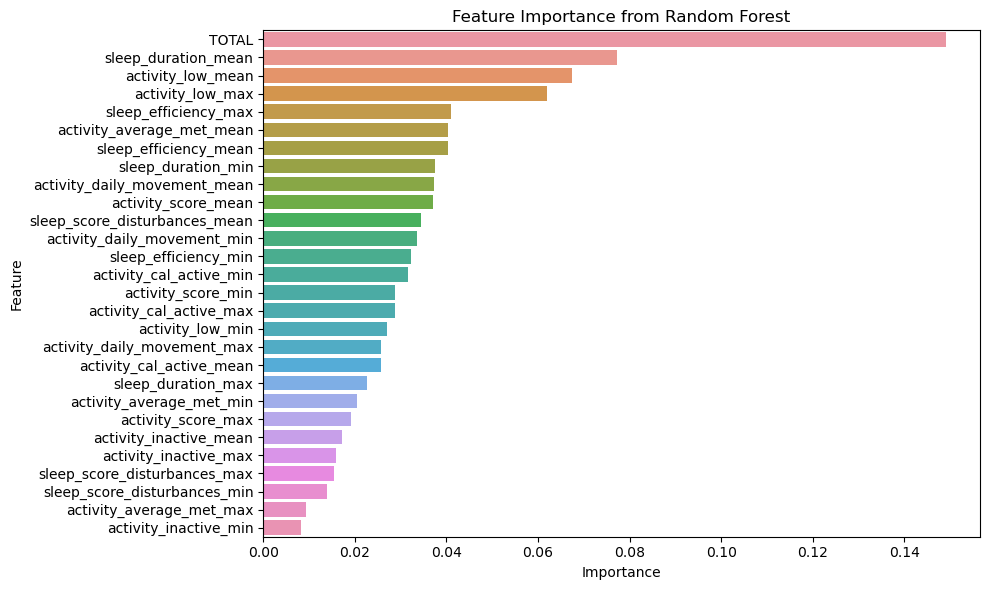

Validation Accuracy: 0.97


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# DIAG_NM을 종속 변수로 설정하고 독립 변수와 분리
X_train = train_agg.drop(columns=['DIAG_NM'])
y_train = train_agg['DIAG_NM']

# 랜덤포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 중요한 피처 추출
feature_importances = rf_model.feature_importances_

# 피처 중요도를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 결과 출력
print(importance_df)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 검증 데이터로 예측 정확도 확인 (선택 사항)
X_val = val_agg.drop(columns=['DIAG_NM'])
y_val = val_agg['DIAG_NM']
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

In [34]:
val_agg.shape

(33, 29)

### **상위 중요도 피쳐만을 이용해서 로지스틱 회귀 수행**

In [35]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Feature Importance에서 상위 10개 변수 선택
top_features = [
    'TOTAL', "sleep_duration_mean", "activity_low_mean", 
    "sleep_efficiency_max", 
    "activity_average_met_mean", "activity_daily_movement_mean",
    "activity_score_mean"
]

# 데이터셋 로드 (예시, 데이터셋 이름을 대체하세요)
# target은 종속 변수 (0/1 값), features는 독립 변수
X_train = train_agg[top_features]
y_train = train_agg["DIAG_NM"]
X_test = val_agg[top_features]
y_test = val_agg["DIAG_NM"]

In [36]:
# 상수항 추가 (Intercept)
X_train_const = sm.add_constant(X_train)

# 로지스틱 회귀 모델 학습
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.077633
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                DIAG_NM   No. Observations:                  141
Model:                          Logit   Df Residuals:                      133
Method:                           MLE   Df Model:                            7
Date:                Sat, 30 Nov 2024   Pseudo R-squ.:                  0.6730
Time:                        10:23:20   Log-Likelihood:                -10.946
converged:                       True   LL-Null:                       -33.470
Covariance Type:            nonrobust   LLR p-value:                 1.339e-07
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           39.4164     48.135      0.819      0.41

In [37]:
# 로지스틱 회귀 모델 초기화 및 학습
logistic_model = LogisticRegression(max_iter=10000, class_weight='balanced')  # class_weight='balanced'로 클래스 불균형 처리
logistic_model.fit(X_train, y_train)

# 검증 데이터 예측
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# 분류 리포트 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00         3

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

Confusion Matrix:
 [[30  0]
 [ 0  3]]


### **TOTAL 제외**

In [39]:
top_features = [
    "sleep_duration_mean", "activity_low_mean", 
    "sleep_efficiency_max", 
    "activity_average_met_mean", "activity_daily_movement_mean",
    "activity_score_mean"
]

# 데이터셋 로드 (예시, 데이터셋 이름을 대체하세요)
# target은 종속 변수 (0/1 값), features는 독립 변수
X_train = train_agg[top_features]
y_train = train_agg["DIAG_NM"]
X_test = val_agg[top_features]
y_test = val_agg["DIAG_NM"]

In [40]:
X_train_const = sm.add_constant(X_train)

# 로지스틱 회귀 모델 학습
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.180639
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                DIAG_NM   No. Observations:                  141
Model:                          Logit   Df Residuals:                      134
Method:                           MLE   Df Model:                            6
Date:                Sat, 30 Nov 2024   Pseudo R-squ.:                  0.2390
Time:                        10:23:58   Log-Likelihood:                -25.470
converged:                       True   LL-Null:                       -33.470
Covariance Type:            nonrobust   LLR p-value:                   0.01375
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.2506     28.528      0.044      0.965

In [41]:
logistic_model = LogisticRegression(max_iter=10000, class_weight='balanced')  # class_weight='balanced'로 클래스 불균형 처리
logistic_model.fit(X_train, y_train)

# 검증 데이터 예측
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# 분류 리포트 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.6363636363636364
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        30
           1       0.20      1.00      0.33         3

    accuracy                           0.64        33
   macro avg       0.60      0.80      0.54        33
weighted avg       0.93      0.64      0.71        33

Confusion Matrix:
 [[18 12]
 [ 0  3]]


### **P-value가 작은 피쳐만을 이용해서 로지스틱 회귀 수행**

In [50]:
top_features = [
    "TOTAL", "activity_low_mean", 
    "sleep_efficiency_max", 
    "activity_average_met_mean", "activity_daily_movement_mean"
]

# 데이터셋 로드 (예시, 데이터셋 이름을 대체하세요)
# target은 종속 변수 (0/1 값), features는 독립 변수
X_train = train_agg[top_features]
y_train = train_agg["DIAG_NM"]
X_test = val_agg[top_features]
y_test = val_agg["DIAG_NM"]

In [51]:
# 상수항 추가 (Intercept)
X_train_const = sm.add_constant(X_train)

# 로지스틱 회귀 모델 학습
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.079083
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                DIAG_NM   No. Observations:                  141
Model:                          Logit   Df Residuals:                      135
Method:                           MLE   Df Model:                            5
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.6668
Time:                        22:06:21   Log-Likelihood:                -11.151
converged:                       True   LL-Null:                       -33.470
Covariance Type:            nonrobust   LLR p-value:                 1.718e-08
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           22.6199     34.341      0.659      0.51

In [52]:
# 로지스틱 회귀 모델 초기화 및 학습
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # class_weight='balanced'로 클래스 불균형 처리
logistic_model.fit(X_train, y_train)

# 검증 데이터 예측
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# 분류 리포트 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       0.50      1.00      0.67         3

    accuracy                           0.91        33
   macro avg       0.75      0.95      0.81        33
weighted avg       0.95      0.91      0.92        33

Confusion Matrix:
 [[27  3]
 [ 0  3]]


## **데이터 불균형 문제 해결 시도**

In [41]:
from imblearn.over_sampling import SMOTE

top_features = [
    "TOTAL", "activity_low_mean", 
    "sleep_efficiency_max", 
    "activity_average_met_mean", "activity_daily_movement_mean"
]

# target은 종속 변수 (0/1 값), features는 독립 변수
X_train = train_agg[top_features]
y_train = train_agg["DIAG_NM"]
X_test = val_agg[top_features]
y_test = val_agg["DIAG_NM"]

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (141, 5) (141,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (264, 5) (264,)
SMOTE 적용 후 레이블 값 분포: 
 DIAG_NM
0    132
1    132
Name: count, dtype: int64


In [42]:
# 상수항 추가 (Intercept)
X_train_const = sm.add_constant(X_train_over)

# 로지스틱 회귀 모델 학습
logit_model = sm.Logit(y_train_over, X_train_const)
result = logit_model.fit()

# 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.120923
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                DIAG_NM   No. Observations:                  264
Model:                          Logit   Df Residuals:                      258
Method:                           MLE   Df Model:                            5
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.8255
Time:                        21:52:12   Log-Likelihood:                -31.924
converged:                       True   LL-Null:                       -182.99
Covariance Type:            nonrobust   LLR p-value:                 3.482e-63
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           14.0336     30.721      0.457      0.64

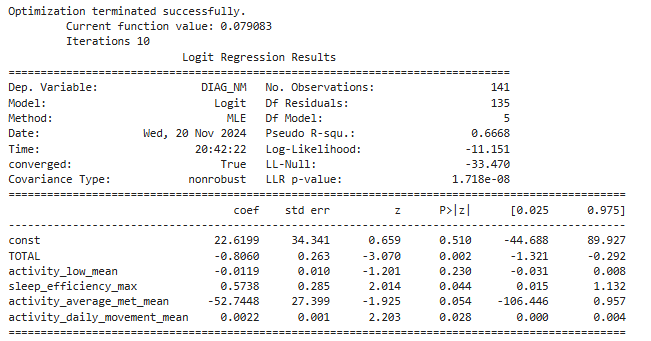

In [43]:
# 로지스틱 회귀 모델 초기화 및 학습
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # class_weight='balanced'로 클래스 불균형 처리
logistic_model.fit(X_train_over, y_train_over)

# 검증 데이터 예측
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# 분류 리포트 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       0.50      1.00      0.67         3

    accuracy                           0.91        33
   macro avg       0.75      0.95      0.81        33
weighted avg       0.95      0.91      0.92        33

Confusion Matrix:
 [[27  3]
 [ 0  3]]


smote 결과 모델의 지표가 전체적으로 개선되었음

In [44]:
# Feature Importance에서 상위 10개 변수 선택
top_features = [
    "sleep_duration_mean", "activity_low_mean", 
    "sleep_efficiency_max", 
    "activity_average_met_mean", "activity_daily_movement_mean",
    "activity_score_mean"
]

# 데이터셋 로드 (예시, 데이터셋 이름을 대체하세요)
# target은 종속 변수 (0/1 값), features는 독립 변수
X_train = train_agg[top_features]
y_train = train_agg["DIAG_NM"]
X_test = val_agg[top_features]
y_test = val_agg["DIAG_NM"]

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (141, 6) (141,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (264, 6) (264,)
SMOTE 적용 후 레이블 값 분포: 
 DIAG_NM
0    132
1    132
Name: count, dtype: int64


### **TOTAL 없이 시도**

In [45]:
# 상수항 추가 (Intercept)
X_train_const = sm.add_constant(X_train_over)

# 로지스틱 회귀 모델 학습
logit_model = sm.Logit(y_train_over, X_train_const)
result = logit_model.fit()

# 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.481336
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                DIAG_NM   No. Observations:                  264
Model:                          Logit   Df Residuals:                      257
Method:                           MLE   Df Model:                            6
Date:                Wed, 20 Nov 2024   Pseudo R-squ.:                  0.3056
Time:                        21:52:12   Log-Likelihood:                -127.07
converged:                       True   LL-Null:                       -182.99
Covariance Type:            nonrobust   LLR p-value:                 8.407e-22
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           16.1807     15.905      1.017      0.309

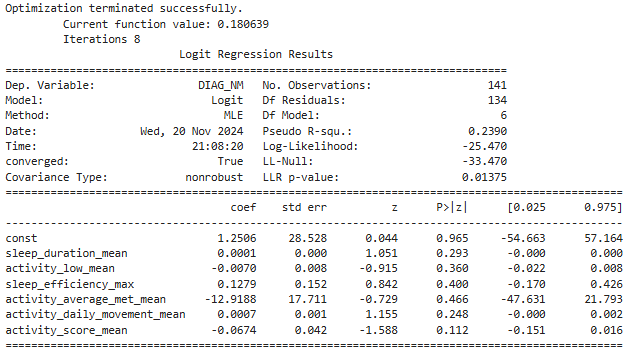

P-value가 극적으로 개선

In [46]:
# 로지스틱 회귀 모델 초기화 및 학습
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # class_weight='balanced'로 클래스 불균형 처리
logistic_model.fit(X_train_over, y_train_over)

# 검증 데이터 예측
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# 분류 리포트 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.6363636363636364
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        30
           1       0.20      1.00      0.33         3

    accuracy                           0.64        33
   macro avg       0.60      0.80      0.54        33
weighted avg       0.93      0.64      0.71        33

Confusion Matrix:
 [[18 12]
 [ 0  3]]


### **결론**

SMOTE 사용결과 모델의 통계적 특성에 긍정적인 영향을 미치는 것을 확인

다만 SMOTE는 train 데이터에만 사용이 가능함

추후에 TEST 데이터의 치매환자데이터만 늘릴 수 있으면 좋을 듯